In [ ]:
!pip install plotly
!pip install cufflinks
!pip install pyarrow --user
!pip install datashader

In [ ]:
import holoviews as hv, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

ModuleNotFoundError: ignored

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pylab as plt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='ggplot',offline=True) 

In [2]:
class display(object):
    """Produce el código HTML para visualizar múltiples objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


El objeto principal de Pandas son los ``DataFrame``s (``Series``en un caso en particular) y son, esencialmente arreglos multidimensionales con etiquetas definidas para las filas y columnas, que pueden almacenar datos de tipos heterogéneos y/o con missing data.

Además de proporcionar una estructura, Pandas tiene muchas operaciones y métodos ya incorporados que hacen de puente entre ocupar hojas de cálculo y bases de datos.


## El objeto Series de Pandas

Un Pandas ``Series`` es un arreglo unidimensional de datos indexados.
Se puede crear, por ejemplo, a partir de una lista o de un arreglo:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Vemos que el objeto ``data`` contiene tanto una secuencia de valores (``values``) como una secuencia de índices (``index``). El atributo ``values`` muestra que los datos en sí no son más que un NumPy array:

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

Y el atributo ``index`` es un arreglo de tipo ``pd.Index`` (que veremos más adelante las ventajas que esto ofrece)


In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

Podemos acceder a secciones de los datos ocupando la misma sintaxis de NumPy 

In [ ]:
data[1]

0.5

In [ ]:
data[1:3]

1    0.50
2    0.75
dtype: float64

**``Series`` como una generalización de un NumPy array**

Recordamos que en NumPy arrays también teníamos índices, pero esos índices eran "inaccesibles", python "decide por nosotros", mientras que en ``series`` tenemos control sobre los valores de esos índices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
data['b']

0.5

Ojo no confundirse con columnas!

Y obviamente los índices no tiene ni por qué ser monotónicos ni secuenciales:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [ ]:
data[5]

0.5

En este contexto uno puede pensar en un ``series``como un tipo muy específico de diccionario, pero al ser un "tipo de diccionario" con una estructura mucho más clara / fija, es también mucho más eficiente que los diccionarios para muchas operaciones.

Para ver la similitud con diccionarios, uno puede de hecho crear un ``series`` a partir de un diccionario:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Por defecto, los ``index``son extraidos de los nombres de las ``keys`` del diccionario, y uno puede acceder a los valores como haría en un diccionario, pero hacer otras cosas, como por ejemplo slicing en los ``index``

In [ ]:
population['California']

38332521

In [ ]:
population['Illinois':'California']

Series([], dtype: int64)

In [ ]:
population['California':'Texas']

California    38332521
Texas         26448193
dtype: int64

Véis algo peculiar?

¿De qué modos podemos construir objetos ``series``?

Sabiendo que la estructura base es
```python
>>> pd.Series(data, index=index)
```

Hay varias opciones:

1.- desde una lista o un np.array (sin especificar los índices)

In [ ]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

2.- desde un escalar repetido para distintos ``index``

In [ ]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

3.- como hemos visto antes: desde un diccionario

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

4.- desde un diccionario pero modificando de hecho los índices a incluir (y su orden)

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

**Pandas ``DataFrame``**

Podemos verlo como la generalización del ``series`` a data de mayor dimensión.

Construyamos uno "por partes":

In [ ]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
# Un Series de áreas
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
              'Illinois': 149995, 'Florida': 170312}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Illinois      149995
Florida       170312
dtype: int64

In [ ]:
# Que podemos unir / cruzar al / con el  series anterior que teníamos
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Al igual que el ``Series``, el ``DataFrame`` tiene los atributos ``index`` y ``values``, pero además, tiene el atributo ``columns```


In [ ]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [ ]:
states.values

array([[38332521,   423967],
       [19552860,   170312],
       [12882135,   149995],
       [19651127,   141297],
       [26448193,   695662]])

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

Y podemos acceder a los valores de las columnas con la sintaxis esperable:

In [ ]:
states['area']  #.values

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [ ]:
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


¿Y como accedemos a las filas?

In [ ]:
states['California']

KeyError: ignored

In [ ]:
print(states.loc['California'])
print(states.iloc[0])

population    38332521
area            423967
Name: California, dtype: int64
population    38332521
area            423967
Name: California, dtype: int64


Veremos esto más adelante, pero fijaros que los "índices" que ocupamos normalmente (en los NumPy arrays) aqui son referentes a las *columnas*, no las *filas*

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

In [ ]:
# Y en este caso no tiene mucho sentido, pero si quiero seleccionar un conjunto de columnas:
states[['area','population']]

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


**Cómo construir ``DataFrames``**

Ya hemos visto un modo uniendo ``Series``, pero también existe la posibilidad de convertir un único objeto ``Series`` en un ``DataFrame``:

In [ ]:
# Principal diferencia con el Series: la columna
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


También podemos crearlo a partir de una lista de diccionarios:

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Y ojo, podemos crear un ``DataFrame`` "uniendo" diccionarios incluso si no comparten todas las ``keys``:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


¿Qué ha hecho ``Pandas`` para "rellenar"? (veis que realmente no es una "intersección" sino una "unión")

Como vimos antes, como un diccionario de ``Series``:

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Desde un NumPy array bidimensional:

Especificando si queremos los ``index`` y las ``columns``

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.697675,0.781403
b,0.792420,0.610085
c,0.821374,0.986636


O no!

In [ ]:
pd.DataFrame(np.random.rand(3, 2))

,0,1
0,0.358351,0.626482
1,0.866509,0.807243
2,0.353168,0.847124


Desde una estructura de datos NumPy

In [ ]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [ ]:
type(A)

numpy.ndarray

In [ ]:
B=pd.DataFrame(A)

¿Qué es B?

In [ ]:
type(B)

pandas.core.frame.DataFrame

In [ ]:
B['A'][0]=2

In [ ]:
B

,A,B
0,2,0.0
1,0,0.0
2,0,0.0


In [ ]:
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
B

,A,B
0,2,0.0
1,0,0.0
2,0,0.0


Trabajemos con el tipo de objeto ``index`` que es un atributo tanto del objeto ``Series`` como del ``DataFrame``.

Para empezar, puede contener elementos repetidos (muy distinto a los índices de los NumPy arrays); además es "inmutable" (aunque eso no quiere decir que no podemos operar con estos objetos)


In [ ]:
ind = pd.Index([2, 3, 5, 7, 5, 11])
ind

Int64Index([2, 3, 5, 7, 5, 11], dtype='int64')

In [ ]:
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 5], dtype='int64')

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

6 (6,) 1 int64


In [ ]:
ind[1] = 0

TypeError: ignored

Son precisamente inmutables para que al hacer operaciones entre ``Series`` o ``DataFrames``, podamos "confiar" en que los "matches" van a ser correctos.

Veamos sus operaciones de unión, intersección, etc:

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9, 8, 7])
indB = pd.Index([2, 3, 5, 7, 11, 7])
#indA = pd.Index([1, 3, 5])
#indB = pd.Index([5, 1, 3])

In [ ]:
indA & indB  # intersección (conjunto mínimo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



Int64Index([3, 5, 7], dtype='int64')

In [ ]:
pd.Index.intersection(indA,indB)

Int64Index([3, 5, 7], dtype='int64')

In [ ]:
indA | indB  # union (conjunto máximo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



Int64Index([1, 2, 3, 5, 7, 7, 8, 9, 11], dtype='int64')

In [ ]:
pd.Index.union(indA,indB)

Int64Index([1, 2, 3, 5, 7, 7, 8, 9, 11], dtype='int64')

In [ ]:
indA ^ indB  # diferencia simétrica 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead



Int64Index([1, 2, 8, 9, 11], dtype='int64')

In [ ]:
pd.Index.symmetric_difference(indA,indB)

Int64Index([1, 2, 8, 9, 11], dtype='int64')

**Acceso a los datos en Pandas**

¿Es similar al slicing, masking y fancy indexing de NumPy?

Empecemos con los ``Pandas Series``


In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'd', 'c', 'b'])
data

a    0.25
d    0.50
c    0.75
b    1.00
dtype: float64

In [ ]:
data.index

Index(['a', 'd', 'c', 'b'], dtype='object')

Ya hemos visto que podemos:

In [ ]:
data['b']

1.0

Pero también podemos ocupar expresiones o métodos de diccionarios, por ejemplo:

In [ ]:
0.25 in data.values

True

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
data.keys()  #sintaxis de diccionario

Index(['a', 'd', 'c', 'b'], dtype='object')

In [ ]:
data.index

Index(['a', 'd', 'c', 'b'], dtype='object')

In [ ]:
list(data.items())

[('a', 0.25), ('d', 0.5), ('c', 0.75), ('b', 1.0)]

Y como vismo antes, también podemos editar los valores (por ejemplo también incluir nuevos valores) con sintaxis de tipo diccionario:

In [ ]:
data['e'] = 1.5
data

a    0.25
d    0.50
c    0.75
b    1.00
e    1.50
dtype: float64

In [ ]:
data.index

Index(['a', 'd', 'c', 'b', 'e'], dtype='object')

Pero además, también podemos ocupar la sintaxis que hemos visto de NumPy para acceder a secciones de los datos, crear máscaras, etc:

In [ ]:
#slicing entre índices propios del Series:
data['a':'c']

a    0.25
d    0.50
c    0.75
dtype: float64

In [ ]:
# slicing en los índices "implícitos" del objeto
data[0:2]

a    0.25
d    0.50
dtype: float64

Cuidado con esto! Se comportan como un numpy array, esto es, el extremo superior queda abierto

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]
#(data > 0.3)

d    0.50
c    0.75
dtype: float64

In [ ]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.50
dtype: float64

¿Notáis la diferencia en el output cuando ocupáis los índices "implícitos" para el slicing o los "explícitos"?

Como en el fondo tenemos dos conjuntos de índices que podemos ocupar para acceder a los datos, esto puede llevar a mucha confusión, y por eso existen ``loc``, ``iloc`` e ``ix``

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explícito en este caso
data[1]

'a'

In [ ]:
# pero implícito si hacemos slicing!
data[1:5]

3    b
5    c
dtype: object

Ocupamos ``loc`` cuando nos referimos al índice explícito:

In [ ]:
data.loc[1]

'a'

In [ ]:
#y ahora da igual que sea slicing o no:
data.loc[1:3]

1    a
3    b
dtype: object

Y ocupamos ``iloc`` cuando queremos referirnos a los índices implícitos, es decir, los de Python:

In [ ]:
data.iloc[1]

'b'

In [ ]:
#y de nuevo ya da igual si estamos haciendo slicing o no:
data.iloc[1:3]

3    b
5    c
dtype: object

También existía ``ix`` que es un "híbrido", pero está deprecado.

En caso de la menor duda, mejor ocupad ``iloc`` o ``loc`` y así no hay ambigüedad

Recordatorio:

loc está basado en etiquetas, así que tenemos que especificar el nombre de las filas y columnas que necesitamos filtrar. Por ejemplo, si queremos buscar las filas cuyo índice es 1,2, o 100, no obtendremos la primera, la segunda o la centésima fila, sino que obtendremos los resultados sólo si el nombre de cualquier índice es 1,2, o 100. Usarlo para índices específicos del dataframe.

iloc se basa en índices enteros, así que tenemos que especificar filas y columnas por su índice entero. Si buscamos las filas con índice 1, 2, o 100, devolverá la primera, segunda y centésima filas, independiente del nombre o etiquetas que tengamos en el índice del conjunto de datos.Usarlo para índices nativos de Python.

Veamos ahora todo esto pero para ``DataFrame``

In [ ]:
#area = pd.Series({'California': 423967, 'Texas': 695662,
#                  'New York': 141297, 'Florida': 170312})

area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Como hemos visto antes, podemos acceder a cada columna, que son ``Series`` con una sintaxis similar a los diccionarios:

In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Pero también "invocándolo" como un atributo

In [ ]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

De hecho ambas sintaxis acceden exactamente al mismo objeto

In [ ]:
data.area is data['area']

True

Pero ojo, uno no siempre puede acceder al ``Series`` con la sintaxos de atributo; por ejemplo si el nombre de la columna no es un string, o si hay un conflicto entre el nombre de la columna y un método pre-existente.

In [ ]:
#pop es un método de data, así que en caso de duda, 
#ocupad la sintaxis "tipo diccionario"
data.pop is data['pop']

False

In [ ]:
#Ejemplo de la sintaxis diccionario para añadir una nueva columna
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.density

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
Name: density, dtype: float64

Ok, ahora ``DataFrames`` sus atributos, etc:

In [ ]:
data.values 

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
type(data.values)

numpy.ndarray

Podemos Transponer toda la estructura de datos:

In [ ]:
data.T
# Es sólo un view

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
#para acceder filas, por ejemplo:
print("Fila 0: ", data.values[0])
#y para columnas
print(data['area'])

Fila 0:  [4.23967000e+05 3.83325210e+07 9.04139261e+01]
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


In [ ]:
data[0]

KeyError: ignored

In [ ]:
# Y qué ocurre aquí
data.iloc[0] #['area']

area       4.239670e+05
pop        3.833252e+07
density    9.041393e+01
Name: California, dtype: float64

Como en los ``Series`` tenemos que evitar ambigüedad y para eso podemos ocupar ``loc`` e ``iloc``

In [ ]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Hagamos selecciones más "interesantes"

In [ ]:
data.loc[data.density > 100, ['pop', 'density']]
#data.loc[data.density > 100, ['Florida']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
len(data.loc[data.density > 100].index)

2

Y al igual que en un NumPy array podemos editar el contenido (de los ``values``)

In [ ]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Aprovechad este momento para crear un par de máscaras y cambiar los valores de este ``DataFrame``

Veamos unos detalles: Mientras que *indexing* se refiere a columnas, *slicing* se refiere a filas

In [ ]:
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data['Florida':'Illinois']
#type(data['Florida':'Illinois']['area'].values)

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data[data.density > 100][:'New York']


,area,pop,density
New York,141297,19651127,139.076746


Y podemos hacer slicing pero refiriéndonos a las filas por los números / índices python

In [ ]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [ ]:
# Y las máscaras directas se interpretan de fila en fila en vez de 
# columna en columna
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


**Operaciones con Pandas DataFrames**

Muchas heredadas de NumPy, pero con un añadido muy útil: los resultados de las funciones peservan las etiquetas de los índices y las columnas, así que las operaciones se hacen "pareando" lo que tiene sentido, veamos qué quiere decir esto:

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Veamos esto de "parear", "alinear"

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

si ahora dividimos ambos, hay ciudades que no están en ambos ``Series``:

In [ ]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

El resultado como veíamos se aplica a la unión de los conjuntos de los índices

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Por defecto, los "missing data" se rellenan con NaN (y NaN + cualquier cosa es NaN, por ejemplo), pero uno puede "obligar" a rellenar con un valor en particular

In [ ]:
A.add(B, fill_value=2)

0    4.0
1    5.0
2    9.0
3    7.0
dtype: float64

Veamos lo mismo en ``DataFrame``

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [ ]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Antes de seguir, veamos alguna función más en A:

In [ ]:
A

,A,B
0,1,11
1,5,1


In [ ]:
#A.mean()
#np.mean(A.values)
#A.stack().mean()
#np.mean(A.iloc[0].values)

6.0

Y como podemos entonces, por ejemplo, "rellenar" lo que nos falte de A con la media:

In [ ]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


Ésta es una manera muy simple de hacer data augmentation.

Recordemos algunas operaciones de python que aplican a ``DataFrames``

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |



¿Qué ocurre si mezclamos en una operación un ``Series`` con un ``DataFrame``?

In [ ]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [ ]:
# Qué ocurría con NumPy:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [ ]:
# En Pandas las cosas funcionan igual:

df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]


,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [ ]:
# Y si queremos hacer la operación con una columna en vez de una fila

df.subtract(df['R'], axis=0)
#df.subtract(df['R'])

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [ ]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [ ]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [ ]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


**La "maravilla" de los missing data**: Bienvenidos a la vida real, donde los conjuntos de datos no son homogéneos (faltan datos) y los "proveedores" de datos "representan" los datos faltantes de maneras muy variadas (un valor supuestamente "absurdo", "-9999", totalmente dependiente del dominio, *null*, *NA*, *NaN*, etc.). Otra manera de representar missing values es proveer de una máscara siempre con los datos, donde se indiquen qué datos faltan. Eso sí, esta manera es más costosa en términos de memoria.

Como Pandas maneja los missing data tiene que ver también con como NumPy lo hace: que no contempla algo como NaN para tipos que no sean float. Pandas hereda el objeto Python ``None`` para tipos no float y el equivalente ``NaN`` de NumPy para float.

Pero, por la naturaleza de ``None`` sólo se puede ocupar en arreglos de data type ``object``

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Pero sabemos que este dtype no es muy eficiente

In [ ]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
72.2 ms ± 958 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.25 ms ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Y este tipo no permite ocupar métodos como ``sum()`` o ``min()``

In [ ]:
vals1.sum()

TypeError: ignored

Porque la suma de un integer más un ``None`` no está definida

Y ``NaN``:

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Así que ahora podemos operar, pero recordad como opera ``NaN``

In [ ]:
1+np.nan

nan

In [ ]:
0*np.nan

nan

Así que:

In [ ]:
vals2.sum(), vals2.min(), vals2.max(), vals2.mean()

(nan, nan, nan, nan)

pero:

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2), np.nanmean(vals2)

(8.0, 1.0, 4.0, 2.6666666666666665)

Recordemos entonces que ``NaN``es sólo para float y que Pandas ocupa tanto ``NaN``como ``None`` y "acomoda" el tipo según el objeto

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2))#, dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Pandas ha convertido el None a Nan, y el array a float.

Estos son los cambios que Pandas hará cuando reciba un NA:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Y un string en Pandas es siempre almacenado como un stype ``object`` 



**Clase 2022-10-03**

**Operadores para tratar missing values**

- ``isnull()``: Genera una máscara (boolean) que indica los missing values
- ``notnull()``: Opuesta a ``isnull()``
- ``dropna()``: Devuelve una versión filtrada de los datos
- ``fillna()``: Devuelve una copia de los datos pero con un "relleno" ("data imputation") en los missing values.


In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
# Y podemos aplicar esta máscara

data[data.notnull()]

0        1
2    hello
dtype: object

In [ ]:
# Ojo que aquí NO alteramos el Series:

data.dropna()

0        1
2    hello
dtype: object

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
# Veamos ahora como funciona con ``DataFrame`` donde podemos "jugar" con dimensiones

df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
#aplicado al total
df.dropna()

,0,1,2
1,2.0,3.0,5


In [ ]:
#aplicado por columnas:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


Pero lo que decimos aqui es "si hay al menos un ``NaN`` en la columna, etc, olvida toda la columna", y eso no es necesariamente lo que queremos hacer, ahí entran los parámetros ``how`` y ``thres``. Por ejemplo:

In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# o considerar un mínimo de no NaNs para "quedarse" con esa fila o columna
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


**Data imputation**

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

También podemos rellenar, por ejemplo, en base al valor anterior o al posterior:

In [ ]:
# Teniendo como referencia el anterior:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
#O el posterior:
data = pd.Series([1, np.nan, 2, 3, None], index=list('abcde'))

data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    NaN
dtype: float64

En el caso de los dataframes, si vamos a ocupar alguna de estas dos estrategias, debemos especificar sobre qué eje "moverse":

In [ ]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [ ]:
np.nanmean(df.values) # sobre los values

3.2857142857142856

In [ ]:
np.mean(df.stack())

3.2857142857142856

In [ ]:
df.stack()

0  0    1.0
   2    2.0
1  0    2.0
   1    3.0
   2    5.0
2  1    4.0
   2    6.0
dtype: float64

In [ ]:
#test=df.fillna(np.nanmean(df.values))
test=df.fillna(np.mean(df.stack()))
test

,0,1,2,3
0,1.000000,3.285714,2,3.285714
1,2.000000,3.000000,5,3.285714
2,3.285714,4.000000,6,3.285714


Tened en cuenta que si no hay un valor previo para hacer la propagación (o posterior en bfill), entonces el nan permanece.

**Idexado Jerárquico**

Hasta ahora hemos estado trabajando con datos unidimensionales o bidimensionales en el sentido de la estructura que tenían estos datos, pero muy a menudo querremos trabajar con datos con más dimensiones, y aunque Pandas ofrece los objetos ``Panel``y ``panel4D``específicamente para trabajar con tres y cuatro dimensiones, uno puede crear estructuras multidimensionales a partir del uso de índices jerárquicos (o *multi-indexing*). Que os lo podéis imaginar como "capas" o "subniveles" de índices dentro de otros índices.

Vamos a generar este tipo de objeto ``MultiIndex`` y ver como se comporta ante las operaciones típicas como slicing.

In [ ]:
df.stack()

0  0    1.0
   2    2.0
1  0    2.0
   1    3.0
   2    5.0
2  1    4.0
   2    6.0
dtype: float64

**Indexado jerárquico de un objeto Series**

Para representar un conjunto de datos bidimensionales pero en un objeto ``Series``

**Modo incorrecto**

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop


(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

¿Qué véis incorrecto en ocupar tuplas (específicas) para hacer multi-indexing?

In [ ]:
# Sí podemos hacer slicing:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
# Pero como hacemos fácilmente para seleccionar los valores de 2010?

pop[[i for i in pop.index if i[1] == 2010]]

#Tengo que hacer un loop que sabemos de todo lo que hemos visto hasta
#hasta ahora, que prácticamente nunca es eficiente


(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

Similar pero de un mejor modo **Pandas MultiIndex**

In [ ]:
index2 = [('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
index3 = [('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

index2 = pd.MultiIndex.from_tuples(index2)
index2
#print(index2)
#print(index)

MultiIndex([('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
#index2.levels
index2.codes #antes se llamaba labels

FrozenList([[0, 1, 1, 2, 2], [1, 0, 1, 0, 1]])

Fijaron que de este modo tenemos varios niveles de indexado aqui: los nombres de los estados y los años y podemos "reindexar" nuestro ``Series``

In [ ]:
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop
# Y vemos los niveles del indexado

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Y aprovechar esa estructura:

pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

El resultado anterior es básicamente un subconjunto con un sólo índice

**MultiIndex como una dimensión adicional**

Al final podemos ver que este multiIndex lo único que era es un ``DataFrame`` "disfrazado", y lo podemos de hecho "transformar":

In [ ]:
pop_df = pop.unstack()
print(pop_df.mean())
pop_df

2000    2.456664e+07
2010    2.725921e+07
dtype: float64


,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Y la operación contraria:

In [ ]:
pop_df.stack()
a=pop_df.stack()
a.mean()

25912924.0

In [ ]:
a

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Entonces para qué necesitamos esto?... bueno, igual podemos definit ``MultiIndex`` en ``DataFrames`` 

In [ ]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
# Y operar con ellos como antes:

f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [ ]:
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

¿Cómo creamos directamente objetos pandas con ``MultiIndex``?

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.290549  0.847663
  2  0.850006  0.305519
b 1  0.177255  0.416017
  2  0.591696  0.154308

Al definirlo así y no como tuplas, el objeto ``MultiIndex`` queda "bien" definido en el background.

Además, también podemos pasar un diccionario, en vez de un conjunto de tuplas, y también Pandas lo "convertirá" en un ``MultiIndex`` 

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2010): 19378102}
kk=pd.Series(data)
kk.unstack()

,2000,2010
California,33871648.0,37253956.0
New York,NaN,19378102.0
Texas,20851820.0,25145561.0


Pero, ¿cómo creamos este tipo de objeto de un modo más explícito?
Hay distintos modos: desde arreglos donde se describen los valores de los índices en cada nivel; con tuplas dando los posibles pares de índices, o incluso a partir de un producto cartesiano de índices individuales:

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([list('abc'), list('12')])

MultiIndex([('a', '1'),
            ('a', '2'),
            ('b', '1'),
            ('b', '2'),
            ('c', '1'),
            ('c', '2')],
           )

Por otro lado, podemos dar los niveles y las referencias (que, como ya hemos mencionado, en versiones anteriores de ``Pandas`` se llamaban ``labels`` y ahora ``codes`` 

In [ ]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
#ojo que pueden estar repetidos sin problemas
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 0]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 1)],
           )

Así construidos pueden ser pasados como ``index`` en la creación de un ``Series`` o ``DataFrame`` 

¿Podemos asignar nombres a los niveles para identificarlos mejor? SI

In [ ]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

¿El concepto de ``MultiIndex`` existe sólo para filas? 

No: en los ``DataFrames`` como hemos visto existe una cierta simetría entre filas y columnas, así que no es de extrañar que las columnas también peuden tener estructura en múltiples niveles.

In [ ]:
# estructura jerárquica de índices y columnas
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# datos de ejemplo
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# creando el DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  36.5  45.0  38.1  62.0  38.1
     2      39.0  34.8  38.0  37.4  43.0  36.4
2014 1      40.0  34.9   8.0  37.1  32.0  34.7
     2      37.0  39.0  55.0  38.1  48.0  37.5

Si os fijáis estamos "compactando" 4 dimensiones en una tabla muy facilmente visualizable y operable:

In [ ]:
# ¿Cómo obtengo todos los datos de un paciente? ¿y los de un año?


In [ ]:
health_data['Bob']

type          HR  Temp
year visit            
2013 1      35.0  36.7
     2      28.0  37.6
2014 1      42.0  36.9
     2      39.0  38.6

In [ ]:
health_data.iloc[0]

subject  type
Bob      HR      35.0
         Temp    36.7
Guido    HR      50.0
         Temp    36.7
Sue      HR      20.0
         Temp    37.4
Name: (2013, 1), dtype: float64

In [ ]:
# y los datos de HR de Bob en 2013?


In [ ]:
health_data['Bob']['HR'][2013]

visit
1    35.0
2    28.0
Name: HR, dtype: float64

Vemos con algunos ejemplos más como operar con ``MultiIndex`` bien en ``Series``  bien en ``DataFrames``  

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
#acceder a un nivel completo
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
#o a partes más específicas
pop['California'][2010]
pop['California',2010]


37253956

Podemos hacer slicing parcial, pero veremos un poco más adelante la importancia de que el ``MultiIndex`` esté ordenado

In [ ]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
pop.loc['California':,2000]

state       year
California  2000    33871648
New York    2000    18976457
Texas       2000    20851820
dtype: int64

In [ ]:
# o incluso:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Y por supuesto podemos filtrar con máscaras:

In [ ]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

U ocupar Fancy Indexing:

In [ ]:
#pop[['California', 'Texas']]
pop.loc[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

Recuperemos el ``DataFrame`` de antes para operar con sus ``MultiIndex`` 

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  36.7  50.0  36.7  20.0  37.4
     2      28.0  37.6  41.0  37.7  48.0  37.0
2014 1      42.0  36.9  43.0  37.0  26.0  37.6
     2      39.0  38.6  51.0  37.0  28.0  35.9

Recordamos que las columnas son la "dimensión principal" a la hora de invocar datos en los ``DataFrames``, entonces podemos acceder a los datos de HR de Guido:

In [ ]:
#health_data['Guido']['HR']
health_data['Guido','HR']

year  visit
2013  1        50.0
      2        41.0
2014  1        43.0
      2        51.0
Name: (Guido, HR), dtype: float64

In [ ]:
#Y también podemos ocupar los índices nativos de python:
# Notad que recorre ambos niveles
health_data.iloc[:2, :3]

subject      Bob       Guido
type          HR  Temp    HR
year visit                  
2013 1      35.0  36.7  50.0
     2      28.0  37.6  41.0

Y para cada nivel podemos pasar subconjuntos:

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  36.7  50.0  36.7  20.0  37.4
     2      28.0  37.6  41.0  37.7  48.0  37.0
2014 1      42.0  36.9  43.0  37.0  26.0  37.6
     2      39.0  38.6  51.0  37.0  28.0  35.9

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        35.0
      2        28.0
2014  1        42.0
      2        39.0
Name: (Bob, HR), dtype: float64

PERO, no podemos trabajar con ambigüedades con slicing con tuplas:

In [ ]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: ignored

Pero SI podemos ocupar ``IndexSlice`` (incluso podríamos haber coupado la función de python ``slice()``) para construir la secuencia:

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,35.0,50.0,20.0
2014,1,42.0,43.0,26.0


Recordemos que un objeto tipo Slice nos dice donde empezar, donde parar y el step, vemos un ejemplo (de stackoverflow) para entender un poco esto:

In [ ]:
idx = pd.IndexSlice
print(idx[0])               
print(idx[0,'a'])           
print(idx[:])               
print(idx[0:3])             
print(idx[0.1:2.3])         
print(idx[0:3,'a':'c'])     

0
(0, 'a')
slice(None, None, None)
slice(0, 3, None)
slice(0.1, 2.3, None)
(slice(0, 3, None), slice('a', 'c', None))


En el último caso vemos que lo que "devuelve" son tuplas, por eso es tan útil en ``DataFrames``:
Definimos una tabla con 3 niveles en las filas y uno en las columnas

In [ ]:
level0 = range(0,10)
level1 = list('abcdef')
level2 = ['I', 'II', 'III', 'IV']
mi = pd.MultiIndex.from_product([level0, level1, level2])
df = pd.DataFrame(np.random.random([len(mi),2]), 
                  index=mi, columns=['col1', 'col2'])
df

col1      col2
0 a I    0.166875  0.122312
    II   0.834040  0.510173
    III  0.377020  0.550260
    IV   0.128671  0.602494
  b I    0.680964  0.349034
...           ...       ...
9 e IV   0.215423  0.745792
  f I    0.191033  0.918954
    II   0.152761  0.835501
    III  0.540689  0.845242
    IV   0.706043  0.738709

[240 rows x 2 columns]

In [ ]:
# Vemos 'col1' para todas las filas
df.loc[:,'col1']            

0  a  I      0.166875
      II     0.834040
      III    0.377020
      IV     0.128671
   b  I      0.680964
               ...   
9  e  IV     0.215423
   f  I      0.191033
      II     0.152761
      III    0.540689
      IV     0.706043
Name: col1, Length: 240, dtype: float64

In [ ]:
# Seleccionamos todas las filas con el nivel más alto con valores 0:3.
df.loc[0:3, 'col1']   #ojo el 3 incluido por el loc

0  a  I      0.166875
      II     0.834040
      III    0.377020
      IV     0.128671
   b  I      0.680964
               ...   
3  e  IV     0.377332
   f  I      0.434284
      II     0.105577
      III    0.394854
      IV     0.354585
Name: col1, Length: 96, dtype: float64

In [ ]:
# Como hemos visto antes, en una lista de listas no podemos ocupar ":"
df.loc[[0:3, 'a':'c'], 'col1'] 

SyntaxError: ignored

Podemos ocupar como hemos dicho antes la función ``slice`` de python

In [ ]:
df.loc[(slice(0, 3, None), slice('a', 'c', None)), 'col1']

0  a  I      0.166875
      II     0.834040
      III    0.377020
      IV     0.128671
   b  I      0.680964
      II     0.575716
      III    0.576309
      IV     0.707463
   c  I      0.454809
      II     0.040398
      III    0.783504
      IV     0.854044
1  a  I      0.305762
      II     0.017587
      III    0.244892
      IV     0.859341
   b  I      0.647998
      II     0.986694
      III    0.597569
      IV     0.079502
   c  I      0.393118
      II     0.003867
      III    0.251233
      IV     0.161433
2  a  I      0.969723
      II     0.095035
      III    0.170272
      IV     0.004288
   b  I      0.207658
      II     0.430868
      III    0.022561
      IV     0.043173
   c  I      0.495391
      II     0.080896
      III    0.745564
      IV     0.486538
3  a  I      0.121655
      II     0.636805
      III    0.018727
      IV     0.969325
   b  I      0.604184
      II     0.178685
      III    0.543916
      IV     0.661569
   c  I      0.390059
      II  

In [ ]:
# Aqui es donde pd.IndexSlice es muy útil. Nos ayuda a crear
# un slice que ocupa dos niveles de índices.
df.loc[idx[0:3, 'a':'c'], 'col1'] 


0  a  I      0.166875
      II     0.834040
      III    0.377020
      IV     0.128671
   b  I      0.680964
      II     0.575716
      III    0.576309
      IV     0.707463
   c  I      0.454809
      II     0.040398
      III    0.783504
      IV     0.854044
1  a  I      0.305762
      II     0.017587
      III    0.244892
      IV     0.859341
   b  I      0.647998
      II     0.986694
      III    0.597569
      IV     0.079502
   c  I      0.393118
      II     0.003867
      III    0.251233
      IV     0.161433
2  a  I      0.969723
      II     0.095035
      III    0.170272
      IV     0.004288
   b  I      0.207658
      II     0.430868
      III    0.022561
      IV     0.043173
   c  I      0.495391
      II     0.080896
      III    0.745564
      IV     0.486538
3  a  I      0.121655
      II     0.636805
      III    0.018727
      IV     0.969325
   b  I      0.604184
      II     0.178685
      III    0.543916
      IV     0.661569
   c  I      0.390059
      II  

In [ ]:
# Y podemos expandir la selección al tercer nivel 
df.loc[idx[0:3, 'a':'c', 'I':'III'], 'col1'] 



0  a  I      0.166875
      II     0.834040
      III    0.377020
   b  I      0.680964
      II     0.575716
      III    0.576309
   c  I      0.454809
      II     0.040398
      III    0.783504
1  a  I      0.305762
      II     0.017587
      III    0.244892
   b  I      0.647998
      II     0.986694
      III    0.597569
   c  I      0.393118
      II     0.003867
      III    0.251233
2  a  I      0.969723
      II     0.095035
      III    0.170272
   b  I      0.207658
      II     0.430868
      III    0.022561
   c  I      0.495391
      II     0.080896
      III    0.745564
3  a  I      0.121655
      II     0.636805
      III    0.018727
   b  I      0.604184
      II     0.178685
      III    0.543916
   c  I      0.390059
      II     0.948405
      III    0.804424
Name: col1, dtype: float64

**Modificando los Multi-índices**:

Ya vimos que podemos "redistribuir"  índices ocupando ``stack()`` y ``unstack()``. Pero además podemos precisamente "ordenar" en el sentido más literal de la palabra:

**Índices ordenados y no ordenados**:

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.395018
      2      0.383626
c     1      0.551195
      2      0.007502
b     1      0.830904
      2      0.494972
dtype: float64

In [ ]:
# Vemos que este índice no está ordenado alfanuméricamente 
# y si tratamos de hacer un slide parcial teenmos un error:

try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [ ]:
data['a':'b']

UnsortedIndexError: ignored

In [ ]:
data

char  int
a     1      0.395018
      2      0.383626
c     1      0.551195
      2      0.007502
b     1      0.830904
      2      0.494972
dtype: float64

In [ ]:
# Pero si modificamos este orden:
data = data.sort_index()
data

char  int
a     1      0.395018
      2      0.383626
b     1      0.830904
      2      0.494972
c     1      0.551195
      2      0.007502
dtype: float64

In [ ]:
# ahí podemos hacer parcial slicing sin problemas:
data['a':'b']

char  int
a     1      0.395018
      2      0.383626
b     1      0.830904
      2      0.494972
dtype: float64

**Stacking y unstacking** con varios niveles en un ``Series``, ¿qué hacer?
Especificar el nivel!

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


**Resetting**: Otra manera de "reordenar" los índices de varios niveles pero con un resultado un tanto redundante (donde se crea una columna por cada nivel):

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


**Setting**: es más o menos lo complementario cuando queremos crear un ``MultiIndex`` a partir de los valores de algunas columnas:

In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

**Clase 2022-10-05**

**Data aggregation** en Multi-índices

¿Cómo aplicamos ahora las operaciones por niveles?


In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  36.5  45.0  38.1  62.0  38.1
     2      39.0  34.8  38.0  37.4  43.0  36.4
2014 1      40.0  34.9   8.0  37.1  32.0  34.7
     2      37.0  39.0  55.0  38.1  48.0  37.5

Veamos por ejemplo como promediar las dos visitas de cada año:

In [ ]:
data_mean = health_data.mean(level='year')
data_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().



subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     36.5  35.65  41.5  37.75  52.5  37.25
2014     38.5  36.95  31.5  37.60  40.0  36.10

**Ejercicio**: Visualizar HR y Temp frente al año para cada paciente, y agregar leyenda.

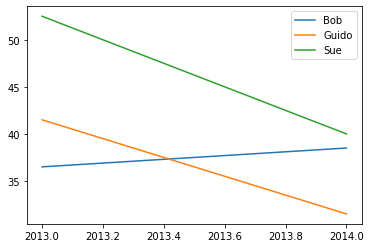

In [ ]:
years=data_mean.index.to_list()
pacientes=data_mean.columns.get_level_values(0).unique().values
for i in pacientes :
  plt.plot(years,data_mean[i]['HR'])
  plt.legend(pacientes)


In [ ]:
pacientes=data_mean.columns.get_level_values(0).unique().values

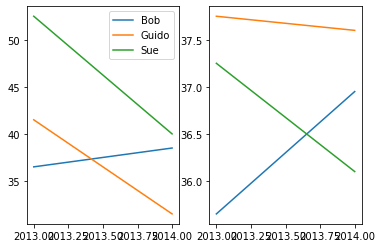

In [ ]:
#data_mean.index.to_numpy()
#data_mean['Bob']['HR'].values

fig, ax = plt.subplots(1,2)

pacientes=data_mean.columns.get_level_values(0).unique().values
years=data_mean.index.to_numpy() # to list
for i in pacientes:
  ax[0].plot(years, data_mean[i]['HR'].values, label=i)
  ax[0].legend()
  ax[1].plot(years, data_mean[i]['Temp'].values, label=i)
  #ax[1].legend()


In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      57.0  37.1  30.0  36.5  30.0  37.9
     2      59.0  35.1  20.0  36.5  37.0  34.7
2014 1      37.0  38.1  50.0  37.1  48.0  36.3
     2      53.0  37.1  35.0  36.1  32.0  37.3

Y además de por niveles, podemos especificar por ejes:

In [ ]:
data_mean.mean(axis=1, level='type')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().



type,HR,Temp
year,,
2013,43.500000,36.883333
2014,36.666667,36.883333


In [ ]:
# de hecho lo anterior es equivalente a:
data_mean.mean(axis=0, level='year')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().



subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     36.5  35.65  41.5  37.75  52.5  37.25
2014     38.5  36.95  31.5  37.60  40.0  36.10

En el fondo este tipo de operación es un atajo para la funcionalidad más potente ``GroupBy`` que vamos a ver más adelante

**Combinando conjuntos de datos:** Concat y Append

Pensemos cuáles son las típicas tareas que queremos poder hacer combinando datos de distinntas fuentes: puede ser simplemente que tenemos dos subconjuntos de datos con similares atributos y simplemente queremos concatenar esos datos, o que tenemos datos de distinta naturaleza y lo que queremos es "mezclar", es decir, combinar para un mismo objeto, información proveniente de distintos conjuntos de datos con distintos atributos.

Empecemos con lo más sencillo, el caso 1:

In [ ]:
def make_df(cols, ind):
    """Crea un DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# ejemplo de DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


Creamos aqui una función también para poder visualizar los ``DataFrame`` uno al lado del otro:

In [ ]:
class display(object):
    """Produce el código HTML para visualizar múltiples objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


**Un paso atrás:** ¿cómo concatenábamos NumPy arrays?

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Y podíamos especificar en qué eje hacer la concatenación:

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

El "equivalente" en Pandas:``pd.concat`` 

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

Que funciona tanto para ``Series`` como para ``DtaFrame``s

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')
#df1
#print(df1)
#print(df2)
#print(pd.concat([df1, df2]))

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Por defecto, la concatenación ocurre en el eje "0", es decir, por las filas, pero al igual que en el caso de NumPy, uno puede especificar qué eje ocupar:

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

Pero qué ocurre si se repiten índices, recordemos que los índices son un elemento principal de Pandas y por tanto se preservan en la concatenación:

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y], axis=0)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Vemos entonces que en el nuevo ``DataFrame`` tenemos índices que están repetidos, y esto es válido y es posible que sea exactamente lo que queramos, pero también es posible que queramos afrontar esta concatenación de otra manera:

**Destacando las repeticiones de índices como un error**

Si ``verify_integrity`` es True, en el proceso de concatenación se levantará un exception is hay índices duplicados:

In [ ]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


**Ignorando los índices duplicados**, ojo, no los datos correspondientes a esos índices, sino los índices en sí. Esto sólo tiene sentido cuando los índices en sí no tenían relevancia para el conjunto de datos:

In [ ]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


**Preservando toda la info en un multi-index**

Si seteamos la opción ``keys`` como etiquetas

In [ ]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

**Concatenación con uniones (joins)**

¿Qué ocurre si concatenamos ``DataFrame``s que comparten el nombre de algunas columnas?

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

Por defecto, como en general en Pandas, los missing values del ``DataFrame`` se "rellenan" con "NaN", pero también, como en general en Pandas, podemos elegir otros comportamientos: por ejemplo ocupar el parámetro ``join``:




In [ ]:
# Aqui con "inner" estamos pasando 
# de generar una "unión" a generar una "intersección"
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Como nota, el parámetro ``join_axes`` fue deprecado y debemos de ocupar ``reindex`` primero y después hacer el join

In [ ]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")


TypeError: ignored

TypeError: ignored

Pero en verdad si se fijan, lo que hemos hecho en varios casos no es más que un append de uno en el otro:

In [ ]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Ojo, la diferencia con el ``append`` de las listas es que pandas NO modifica el objeto!!

In [ ]:
df1b= df1.append(df2)
df1b

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Para modificar precisamente ocuparemos **Merge**

Para esto tenemos que recordar un poco de álgebra relacional que además nos será muy útil en las queries a bases de datos.

**Clase 2022-10-12**

**Tipos de Joins**

``pd.merge()`` trabaja con distintos tipos de cruces: *uno-a-uno*, *muchos-a-uno*, *muchos-a-muchos*. El tipo de unión que se realizará dependerá de los datos en sí

¿Veamos a lo mejor en topcat ejemplos?

**Cruces *uno-a-uno*:**

Es realmente muy parecido a una concatenación por columna

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
# Pero qué ocurre aqui:

df1b = pd.DataFrame({'employee': ['Kate','Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR']})
df2b = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1b', 'df2b')

,employee,group
0,Kate,Accounting
1,Bob,Accounting
2,Jake,Engineering
3,Lisa,Engineering
4,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
df3b = pd.merge(df1b, df2b)
df3b

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Vems que ``merge`` "entiende" que hay una columna común y **muy importante**: ocupa **esa** columna para el cruce, **no** el índice!! Pero veremos más adelante que sí podemos forzar a cruzar por índice con los keywords ``left_index`` y ``right_index`` 

**Cruces *muchos-a-uno*:**

Son casos donde una de las columnas que se ocupa de cruce contiene entradas duplicadas. El resultado del cruce **preservará** esas entradas duplicadas

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

En este caso, la columna supervisor ahora tiene también valores repetidos, esto ocurriría con cualquier otra columna

In [ ]:
df4b = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'loc': ['Main building', 'Warehouse', 'Main building'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4b', 'pd.merge(df3, df4b)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4b
         group            loc supervisor
0   Accounting  Main building      Carly
1  Engineering      Warehouse      Guido
2           HR  Main building      Steve

pd.merge(df3, df4b)
  employee        group  hire_date            loc supervisor
0      Bob   Accounting       2008  Main building      Carly
1     Jake  Engineering       2012      Warehouse      Guido
2     Lisa  Engineering       2004      Warehouse      Guido
3      Sue           HR       2014  Main building      Steve

**Cruces *muchos-a-muchos*:**

Ocurre cuando tenemos entradas duplicadas en las columnas ocupadas para el cruce en ambos ``DataFrames``

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


Vemos que se "repite" la información tantas veces como es necesario para que se preserven todas las combinaciones de empleado grupo y skill dados por un ``DataFrame`` o el otro

¿Pero qué ocurre si los datos no están tan "limpios"? En el sentido de tan "intuitivamenet fácil" de cruzar. ¿Qué posibilidades ofrece ``merge``?

**La opción ``on``:**

Simplemente especificamos en qué columnas hacer el merge (las columnas se tienenq ue llamar igual en ambos ``DataFrames```) ó a qué nivel del índice

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

**Los keywords ``left_on`` y ``right_on``:**

Que ocurre si yo sé que dos columnas en dos ``DataFrame`` distintos contienen la misma información, sólo que el nombre de la columna es distinto e igualmente las quiero ocupar para el cruce:

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Sue','Lisa'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2   Sue  120000
3  Lisa   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa   90000
3      Sue           HR   Sue  120000

Vemos que estamos ahora manteniendo en la tabla información redundante, para limitarla podemos desde el mismo merge decidir no incluir una de las dos:

**OJO** tenemos que expecificar el eje, porque es una columna y el eje por defecto (0) en un ``DataFrame`` son los índices

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,90000
3,Sue,HR,120000


**Los keywords ``left_index`` y ``right_index``:**

Muy amenudo, la "columna" sobre la que queremos hacer el cuce es de hecho el índice:




In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [ ]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


Pero de hecho, los propios ``DataFrame``s incorporan el método ``join()`` que realiza exactamente el merge por defecto en los índices, es decir:

In [ ]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


Y podemos combinar también ``DataFrames`` donde la información para el cruce se encuentre en la columna en uno de ellos y en los índices en el otro (y también con niveles de multi-índices):

In [ ]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2   Sue  120000
3  Lisa   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
3  Engineering  Lisa   90000
2           HR   Sue  120000

**Operaciones en cruces:**

Recordamos el ejemplo de antes sobre lo que ocurre si no todos los elementos de una columna están en la columna correspondiente del otro ``DataFrame``:

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Vemos que el comportamiento por defecto es producir la intersección de ambos conjuntos de datos, lo que se denomina *inner join*, y aunque sea el defecto, lo podemos especificar:

In [ ]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Y obviamente podemos ocupar otras opciones: ``'outer'``, ``'left'``, y ``'right'``. Donde se rellenará con NaN lo que nos falte de uno u otro o ambos lados:


In [ ]:
#ambos
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [ ]:
# "preservo" las entradas de la izquierda
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [ ]:
# "preservo" las entradas de la derecha
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

**Solapando nombres de columnas: el keyword ``suffixes``**

¿Qué hacer si tengo columnas que se llaman igual pero contienen info distinta?

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Con ``on`` elijo la que sí que comparten, y merge, por sí mismo, incluye como "subíndice" de donde viene cada una de las columas con igual nombre pero distinto contenido. Si queremos ocupar un sufijo distinto para que los nombres de las columnas sean más informativos:

In [ ]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Hagamos un ejemplo de como combinar datos de distintos sitios juntos y otro como tarea:

In [ ]:
# Descarguemos unos datos
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   365k      0 --:--:-- --:--:-- --:--:--  365k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   5921      0 --:--:-- --:--:-- --:--:--  5921
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   6184      0 --:--:-- --:--:-- --:--:--  6228


Y leámoslos con ``read_cvs()`` 

In [ ]:
pop = pd.read_csv('state-population.csv') #,index_col='ages')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [ ]:
abbrevs['abbreviation'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MT', 'NE',
       'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [ ]:
pop.describe()

,year,population
count,2544.000000,2.524000e+03
mean,2001.500000,6.805558e+06
std,6.923547,2.855014e+07
min,1990.000000,1.013090e+05
25%,1995.750000,7.423805e+05
50%,2001.500000,1.597005e+06
75%,2007.250000,4.547104e+06
max,2013.000000,3.161288e+08


**Ejercicio** 
¿cómo hacemos el merge que nos resulte en un ``DataFrame`` con los nombres completos de los estados (no los acrónimos) y la población?

In [ ]:
merged = pd.merge(abbrevs,pop, how='outer', left_on='abbreviation', right_on='state/region').drop('abbreviation', axis=1)

In [ ]:
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0


In [ ]:
merged= pd.merge(pop, abbrevs, how='outer',left_on='state/region', right_on='abbreviation').drop('abbreviation', axis=1)

In [ ]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Como hemos ocupado ``outer`` para el ``how`` podemos preguntarnos si hay entradas que no estuvieran en los dos ``DataFrame`` que hemos cruzado

In [ ]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Por lo que vemos que hay algunos nulls en la columna de población, veamos cuales son esas entradas:

In [ ]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


**Ejercicio** 

Cómo obtengo los años mínimo y máximo? 

Cómo puedo ver la distribución de años?

Cómo se compara con los población donde nos faltan datos?

In [ ]:
merged['year'].max()

2013

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([1990. , 1990.9, 1991.8, 1992.7, 1993.6, 1994.5, 1995.4, 1996.3,
        1997.2, 1998.1, 1999. ]),
 <a list of 10 Patch objects>)

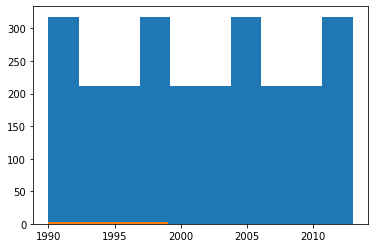

In [ ]:
plt.hist(merged['year'])
plt.hist(merged[merged['population'].isnull()]['year'])

In [ ]:
merged[‘year’].min()/max
plt.hist(merged['year'])
plt.hist(merged[merged['population'].isnull()]['year'])

SyntaxError: ignored

In [ ]:
merged[merged['population'].isnull()]['year']

2448    1990
2449    1990
2450    1991
2451    1991
2452    1993
2453    1993
2454    1992
2455    1992
2456    1994
2457    1994
2458    1995
2459    1995
2460    1996
2461    1996
2462    1998
2463    1998
2464    1997
2465    1997
2466    1999
2467    1999
Name: year, dtype: int64

In [ ]:
print(len(merged['year'].values))

2544


(array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111]),
 array([1990. , 1990.9, 1991.8, 1992.7, 1993.6, 1994.5, 1995.4, 1996.3,
        1997.2, 1998.1, 1999. ]),
 <a list of 10 Patch objects>)

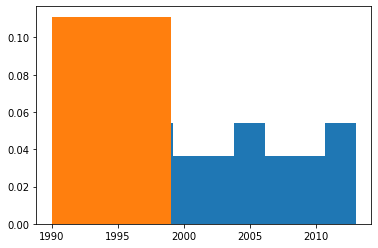

In [ ]:
plt.hist(merged['year'], density=True) #lo que hace density es normalizar
plt.hist(merged[merged['population'].isnull()]['year'], density=True)

Pero como vemos no son sólo datos de población los que faltan, también hay **state** con ``NaN``, lo que quiere decir es que hay falta de correspondencia para algunos estados entre **state** y **state/region**

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

Así que hay entre los NaN datos de Puerto Rico, pero también de Estados Unidos en conjunto.

Rellenemos entonces los datos faltantes:

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
test=merged.loc[merged['population'].isnull(), 'state/region'].index
test

Int64Index([2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458,
            2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467],
           dtype='int64')

In [ ]:
merged.loc[test,'state']

2448    Puerto Rico
2449    Puerto Rico
2450    Puerto Rico
2451    Puerto Rico
2452    Puerto Rico
2453    Puerto Rico
2454    Puerto Rico
2455    Puerto Rico
2456    Puerto Rico
2457    Puerto Rico
2458    Puerto Rico
2459    Puerto Rico
2460    Puerto Rico
2461    Puerto Rico
2462    Puerto Rico
2463    Puerto Rico
2464    Puerto Rico
2465    Puerto Rico
2466    Puerto Rico
2467    Puerto Rico
Name: state, dtype: object

In [ ]:
display('merged.head()','areas.head()')

merged.head()
  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

Y ahora podemos cruzar también con la tabla de las areas

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Veamos ahora si hay mismatches:

In [ ]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

Además de las poblaciones que ya sabemos que nos faltaban datos, parece que también faltan datos en la columna área, veamos por ejemplo si son todos del mismo estado:

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

No es demasiada sorpresa que los datos que faltan son los de USA completo.
¿Cómo calcularían el valor para rellenar? y ¿cómo rellenarían?

In [ ]:
final['area (sq. mi)'][~final['area (sq. mi)'].isnull()].unique().sum()

3790399.0

In [ ]:
final.loc[final['state'] == 'United States', 'area (sq. mi)'] = 3790399.0

In [ ]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)    False
dtype: bool

Pero como vamos a querer calcular densidades de población, en este caso, vamos de hecho a ignorar las entradas para las que no tengamos o bien población o bien área (que, convenientemente, son las únicas columnas con nan):

Recordad que aqui podíamos ocupar ``threshold`` y otros argumentos pero queremos quitar TODAS las entradas que tengan algún NaN en alguna columna.

In [ ]:
final.dropna(inplace=True) #altera el dataframe final
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Aqui vamos a ir "transicionando" a lenguaje más típico de bases de datos, porque vamos a aplicar ``query`` a nuestro dataframe con el ``where`` de bases de datos, es decir, el filtro, la condición, que sea *datos del año 2010 y del total de la población* (es decir, no segregadas por edad)

In [ ]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

**Query**

In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'").drop(['year', 'ages'], axis=1)
data2010.head()

,state/region,population,state,area (sq. mi)
3,AL,4785570.0,Alabama,52423.0
91,AK,713868.0,Alaska,656425.0
101,AZ,6408790.0,Arizona,114006.0
189,AR,2922280.0,Arkansas,53182.0
197,CA,37333601.0,California,163707.0


Ahora podemos organizar este dataset, por ejemplo, teniendo como índice la columna **state** y calculando la densidad de cada estado:

In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
#qué se os curre que hace ``inplace``

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [ ]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [ ]:
final['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'United States'], dtype=object)

**Ejercicio**

Hacer un plot de densidad por año para cada estado para edades 'total'

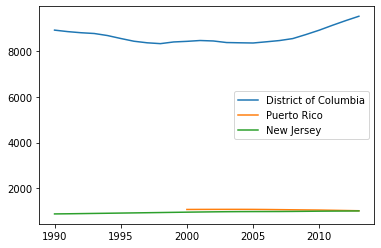

In [ ]:
estados=['District of Columbia', 'Puerto Rico', 'New Jersey']
for estado in estados:
  cadena="state == '"+ estado +"' & ages == 'total'" #importante: definirlo a parte y no directamente en el query (estado es una variable de python)
  #print(cadena)
  data=final.query(cadena)
  plt.plot(data['year'], data['population']/data['area (sq. mi)'], label=estado)
  plt.legend()
  #dataestado=final[final['state']==estado]
  #print(dataestado.head())

**Clase 2022-10-17**

**Aggregation y Grouping**

Ya hemos visto como resumir (en np y pd) la información en un conjunto de datos calculando *aggregations* como ``sum()``, ``mean()``, ``median()``, etc. Aqui repasaremos estas funciones y añadiremos la de ``groupby``.

**Datos de planetas** 

Vamos a ocupar uno de los datasets de Seaborn (muy útil para visualización) que nos proporciona un listado de exoplanetas (más de mil exoplanetas descubiertos hasta 2014) y está "precocinado"

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Recordando el tipo de *aggregation* que habíamos hecho con np pero aplicados a ``Series`` y a ``DataFrames``

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
print(ser.sum(), ser.mean())
ser

2.811925491708157 0.5623850983416314


0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [ ]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [ ]:
#y especificando el eje:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

"Limpiemos" un poco nuestros datos, es decir, descartemos nans, por cierto, antes de eso, cuantos nans hay?

In [ ]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Ahora sí, limpiamos los nans y vemos en general "qué pinta tiene" el ``DataFrame```


In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Tabla muy útil de funciones de *aggregation* en pandas (tanto para Series como para DataFrames):

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |


**GroupBy: Split, Apply, Combine**

El nombre *group by* de hecho viene de SQL (que es el lenguaje que vamos a aprender para interactuar con bases de datos relacionales), pero a lo mejor se os hace más fácil entenderlo como *separo, aplico, combino*

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" width=500 height=450 />


En principio esta secuencia de tareas se podría hacer (y lo hemos hecho antes) como una combinación de *aggregation*, masking y merging. La gracias de ``GroupBy`` es que nos permite hacer la tarea "de a una" sin pensarla paso a paso.

Veamos primero un ejemplo muy sencillo (como el de la figura):

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


Aplicamos el método ``groupby`` a una columna, por ejemplo **key**:

In [ ]:
df.groupby('key')

Fijaos que el resultado no es un ``DataFrame`` o un conjunto de ``DataFrame``s, sino un objeto de tipo ``DataFrameGroupBy``.

Podéis pensar en este tipo de objeto como una view especial del ``DataFrame`` original que está pensada para acceder a los grupos de objetos pero que no hace ninguna operación hasta que se aplica el *aggregate*. Al estar "precocinado" para esto, las funciones *aggregate* son muy eficientes sobre estos objetos y nos entregan la combinación final:

In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


Veamos en más detalle las propiedades, ventajas, etc de los objetos ``GroupBy`` ocupando los datos de los exoplanetas

**Indexado por columnas** *anidado*

In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
planets.groupby('method')

In [ ]:
# Y de ese objeto, por ejemplo podemos crear un ``Series``
planets.groupby('method')['orbital_period']

In [ ]:
# Y si aplicamos alguna función aggregation

planets.groupby('method')['orbital_period'].min()

method
Astrometry                        246.360000
Eclipse Timing Variations        1916.250000
Imaging                          4639.150000
Microlensing                     1825.000000
Orbital Brightness Modulation       0.240104
Pulsar Timing                       0.090706
Pulsation Timing Variations      1170.000000
Radial Velocity                     0.736540
Transit                             0.355000
Transit Timing Variations          22.339500
Name: orbital_period, dtype: float64

In [ ]:
planets.groupby('method')['year'].median()

method
Astrometry                       2011.5
Eclipse Timing Variations        2010.0
Imaging                          2009.0
Microlensing                     2010.0
Orbital Brightness Modulation    2011.0
Pulsar Timing                    1994.0
Pulsation Timing Variations      2007.0
Radial Velocity                  2009.0
Transit                          2012.0
Transit Timing Variations        2012.5
Name: year, dtype: float64

Operaciones **iterativas** sobre grupos (aunque de un modo menos manual ocuparemos ``apply``):

In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} nobj={1}".format(method, group.shape[0]))

Astrometry                     nobj=2
Eclipse Timing Variations      nobj=9
Imaging                        nobj=38
Microlensing                   nobj=23
Orbital Brightness Modulation  nobj=3
Pulsar Timing                  nobj=5
Pulsation Timing Variations    nobj=1
Radial Velocity                nobj=553
Transit                        nobj=397
Transit Timing Variations      nobj=4


**Traspaso de métodos** Métodos que no estén implementados en los objetos ``GroupBy`` se pasarán y aplicarán a los grupos (que pueden ser ``DataFrame``s o ``Series``). Por ejemplo:

In [ ]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [ ]:
planets.groupby('method')['year'].describe()['count']

method
Astrometry                         2.0
Eclipse Timing Variations          9.0
Imaging                           38.0
Microlensing                      23.0
Orbital Brightness Modulation      3.0
Pulsar Timing                      5.0
Pulsation Timing Variations        1.0
Radial Velocity                  553.0
Transit                          397.0
Transit Timing Variations          4.0
Name: count, dtype: float64

In [ ]:
tecnicas = planets.groupby('method').describe().index.values
tecnicas

array(['Astrometry', 'Eclipse Timing Variations', 'Imaging',
       'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'], dtype=object)

¿Cómo podríamos visualizar el número total de detecciónes (cumulativo) por técnica y por año?

[0. 2.]
[0. 9.]
[ 0. 38.]
[ 0. 23.]
[0. 3.]
[0. 5.]
[0. 1.]
[  0. 553.]
[  0. 397.]
[0. 4.]


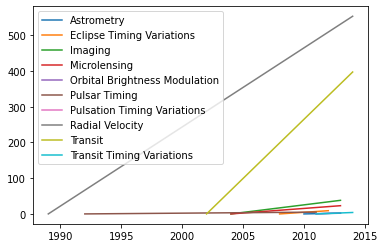

In [ ]:
tecnicas=planets.groupby('method')['year'].describe().index.values
subcon=planets.groupby('method')['year'].describe()
subcon
for tec in tecnicas:
  plt.plot(np.array([subcon.loc[tec,'min'],subcon.loc[tec,'max']]), np.array([0,subcon.loc[tec,'count']]), label=tec)
  print(np.array([0,subcon.loc[tec,'count']]))
plt.legend()


In [ ]:
planets.groupby('method').describe()

number                                           \
                               count      mean       std  min  25%  50%   75%   
method                                                                          
Astrometry                       2.0  1.000000  0.000000  1.0  1.0  1.0  1.00   
Eclipse Timing Variations        9.0  1.666667  0.500000  1.0  1.0  2.0  2.00   
Imaging                         38.0  1.315789  0.933035  1.0  1.0  1.0  1.00   
Microlensing                    23.0  1.173913  0.387553  1.0  1.0  1.0  1.00   
Orbital Brightness Modulation    3.0  1.666667  0.577350  1.0  1.5  2.0  2.00   
Pulsar Timing                    5.0  2.200000  1.095445  1.0  1.0  3.0  3.00   
Pulsation Timing Variations      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
Radial Velocity                553.0  1.721519  1.157141  1.0  1.0  1.0  2.00   
Transit                        397.0  1.954660  1.399119  1.0  1.0  1.0  2.00   
Transit Timing Variations        4.0  2.250000  0.500000  2.0  2.0  2.0  2.25   

                                   orbital_period                 ...  \
                               max          count           mean  ...   
method                                                            ...   
Astrometry                     1.0            2.0     631.180000  ...   
Eclipse Timing Variations      2.0            9.0    4751.644444  ...   
Imaging                        4.0           12.0  118247.737500  ...   
Microlensing                   2.0            7.0    3153.571429  ...   
Orbital Brightness Modulation  2.0            3.0       0.709307  ...   
Pulsar Timing                  3.0            5.0    7343.021201  ...   
Pulsation Timing Variations    1.0            1.0    1170.000000  ...   
Radial Velocity                6.0          553.0     823.354680  ...   
Transit                        7.0          397.0      21.102073  ...   
Transit Timing Variations      3.0            3.0      79.783500  ...   

                                distance            year               \
                                     75%      max  count         mean   
method                                                                  
Astrometry                       19.3225    20.77    2.0  2011.500000   
Eclipse Timing Variations       500.0000   500.00    9.0  2010.000000   
Imaging                         132.6975   165.00   38.0  2009.131579   
Microlensing                   4747.5000  7720.00   23.0  2009.782609   
Orbital Brightness Modulation  1180.0000  1180.00    3.0  2011.666667   
Pulsar Timing                  1200.0000  1200.00    5.0  1998.400000   
Pulsation Timing Variations          NaN      NaN    1.0  2007.000000   
Radial Velocity                  59.2175   354.00  553.0  2007.518987   
Transit                         650.0000  8500.00  397.0  2011.236776   
Transit Timing Variations      1487.0000  2119.00    4.0  2012.500000   

                                                                           \
                                    std     min      25%     50%      75%   
method                                                                      
Astrometry                     2.121320  2010.0  2010.75  2011.5  2012.25   
Eclipse Timing Variations      1.414214  2008.0  2009.00  2010.0  2011.00   
Imaging                        2.781901  2004.0  2008.00  2009.0  2011.00   
Microlensing                   2.859697  2004.0  2008.00  2010.0  2012.00   
Orbital Brightness Modulation  1.154701  2011.0  2011.00  2011.0  2012.00   
Pulsar Timing                  8.384510  1992.0  1992.00  1994.0  2003.00   
Pulsation Timing Variations         NaN  2007.0  2007.00  2007.0  2007.00   
Radial Velocity                4.249052  1989.0  2005.00  2009.0  2011.00   
Transit                        2.077867  2002.0  2010.00  2012.0  2013.00   
Transit Timing Variations      1.290994  2011.0  2011.75  2012.5  2013.25   

                                       
                                  

### Aggregate, filter, transform, apply

Hasta ahora hemos visto un tipo de operación que podermos hacer, pero los objetos ``GroupBy`` tienen los métodos ``aggregate()``, ``filter()``, ``transform()``, y ``apply()`` que nos permiten hacer más operaciones útiles antes de "re-agrupar".

Definamos un ``DataFrame`` simple para ver estas posibilidades:

In [3]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**Aggregation**

Además de ocupar una función de aggregation cada vez por separado, podemos "combinar" varias:

In [4]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [5]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

También podemos pasar un diccionario que detalle qué operación hacer para los grupos:

In [6]:
a=df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'}) #, columns=['min data1','max data2'])
a

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [7]:
a.columns=['min data1','max data2']
a

,min data1,max data2
key,,
A,0,5
B,1,7
C,2,9


In [ ]:
df.groupby?

**Filtrado:**

Una operación de filtrado nos permite descartar datos basándonos en las propiedades de los grupos. Por ejemplo, podríamos querer filtrar y sólo quedarnos con grupos que verifiquen algún criterio, como que la desviación estandar esté por encima de algún valor:

In [8]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

Si os fijáis la función ``filter`` lo que está actuando es como una máscara de True o False según si se verifica la propiedad para el grupo, pero ojo:

In [9]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**Clase 24-10-2022**

**Transformation:**

Con aggregation lo que hacemos es "reducir" los datos a algun estadístico por ejemplo de resumen, pero también es posible que queramos transformar los datos, por grupos, antes de recombinar, por ejemplo, podemos querer "centrar los datos por grupos", es decir podemos querer sustraer a cada elemento de un grupo, la media de ese grupo:


In [12]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


Pero recordad que no estamos editando el DataFrame:

In [13]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**apply():**

Este método nos permite aplicar cualquier función por grupos y nos devolverá o bien un ``DataFrame``, o un ``Series`` o un escalar según sea la función que aplicamos (y ese "qué recibir y qué devolver", es la única limitación). Por ejemplo, si queremos normalizar la primera columna por la suma de la segunda, podemos hacer lo siguiente:


In [16]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    x['data2'] -= x['data2'].mean()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,1.0
1,B,0.142857,-3.5
2,C,0.166667,-3.0


**Cómo especificar cómo agrupar**

Hasta ahora para agrupar hemos ocupado una columan "key", pero esa no es la única posibilidad.


**Una lista, un ``array``, un ``Series``, o un objeto ``index``** puede ser lo proporcionado para hacer los grupos.

Lo que es necesario, obviamente, es que, el objeto que se vaya a ocupar como "key" para hacer los grupos, tiene que tener el mismo número de filas que el``DataFrame``. 

Por ejemplo:




In [21]:
L = [0, 2, 0, 2, 2, 0]
#L = ['a', 'b', 'b', 'a', 'c', 'c']

display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
2      8     10

Así que claro, si queremos escribir más, en vez de ``df.groupby('key').sum()`` podemos escribir:

In [ ]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

Ejemplo de un **diccionario** o un **``Series``** que indique cómo hacer los grupos (por ejemplo a partir de valores de una columna):

In [23]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


Con **una función de python**, lo podéis ver como una extensión / ampliación del caso anterior: tengo una función que me hace el mapeo del objeto índice a como agrupar:

In [25]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


Y algo muy versátil es que estos filtros, y estas distintas maneras de definirlos, se pueden combinar:

In [27]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


**Ejemplo** 

Con los datos de los planetas hagamos un conteo de los planetas descubiertos por década y por método:

In [28]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [29]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [31]:
decada=(planets['year']//10)*10
decada

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [36]:
#decada
planets.groupby(['method',decada])['number'].sum()#.unstack().fillna(0)

method                         year
Astrometry                     2010      2
Eclipse Timing Variations      2000      5
                               2010     10
Imaging                        2000     29
                               2010     21
Microlensing                   2000     12
                               2010     15
Orbital Brightness Modulation  2010      5
Pulsar Timing                  1990      9
                               2000      1
                               2010      1
Pulsation Timing Variations    2000      1
Radial Velocity                1980      1
                               1990     52
                               2000    475
                               2010    424
Transit                        2000     64
                               2010    712
Transit Timing Variations      2010      9
Name: number, dtype: int64

**Tablas pivote (*pivot*)**

Hemos visto que con ``GroupBy`` podemos explorar relaciones entre los datos. Una tabla pivote lo que hace es recibir datos de una columna como input y agrupa las entradas de esa columna en una tabla bidimensional que nos entrega el "resumen" de esos datos. De este modo a lo mejor ayuda pensar en una tabla pivote como una versión multidimensinal del ``GroupBy`` aggregate, en el sentido que haces "divide-aplica-combina", pero el divide y combina, se hace a través no de un índice unidimensional pero una grid bi-dimensional.

Veámoslo más despacio:

**Motivación**
Vamos a ocupar otro conjunto de ejemplo en seaborn que es una "base de datos" de los pasajeros del *Titanic*. Tenemos información sobre cada pasajero (incluyendo género, edad, clase, tarifa pagada y mucho más)

In [37]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Tabla pivote** "a mano":
Empecemos por ocupar ``GroupBy`` para tener una idea de la tasa de supervivencia por género

In [38]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Pero qué ocurre si además queremos combinar también en qué clase viajaban en nuestra estadística:

In [59]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')#.unstack()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

Esto de momento va bien, pero si queremos combinar muchos "ingredientes" la sintaxis se puede volver muy compleja y es mejor ocupar ``pivot_table`` donde le digo qué incluir en el group y en el aggregate

In [64]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Y, al igual que con ``GroupBy``, podemos tener relacines multinivel:

In [42]:
# con la función ``cut`` hace el conteo 
#en los bins proporcionados por el segundo argumento
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [47]:
# equivalente, existe la función qcut para calcular los percentiles
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

¿Pero tienen que ser siempre promedios el aggregate? No!, pero el ``aggfun``de pivot_table, por defecto es 'mean', que puede ser sustituido por 'sum', 'count', 'min', 'max', o cualquier otro aggregate function

In [44]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
url='https://www.dropbox.com/s/707wck4h2vyoazf/population_total.csv?dl=0'
#!wget https://www.dropbox.com/s/707wck4h2vyoazf/population_total.csv?dl=0
os.system("wget %s"%url)

0

In [ ]:
!ls

 a.csv	'population_total.csv?dl=0'   sample_data


In [ ]:
!head population_total.csv?dl=0

country,year,population
China,2020,1439323776
China,2019,1433783686
China,2018,1427647786
China,2017,1421021791
China,2016,1414049351
China,2015,1406847870
China,2010,1368810615
China,2005,1330776380
China,2000,1290550765


In [ ]:
cc=pd.read_csv("population_total.csv?dl=0",index_col='country')


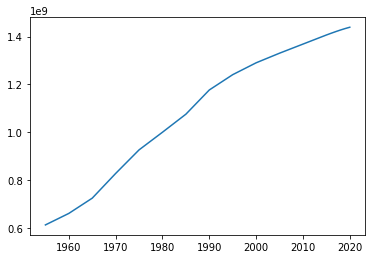

In [ ]:
plt.plot(cc.loc['China']['year'], cc.loc['China']['population'])
# Incluyan la comparación con otros paises (con leyendas, etc)

In [ ]:
#leyend sin asignar un índice:
df_population = pd.read_csv('population_total.csv?dl=0')

# dropping null values
df_population = df_population.dropna()
# reshaping the dataframe
df_population = df_population.pivot(index='year', columns='country',
                                    values='population')
# selecting 5 countries
df_population = df_population[['United States', 'India', 'China', 
                               'Indonesia', 'Brazil']]

In [ ]:
df_population

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [ ]:
df_population.iplot(kind='line',xTitle='Years', yTitle='Population',
                    title='Population (1955-2020)')

**Datashader ejemplo**

In [ ]:
df=pd.read_parquet(
    'https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq',
    columns=['dropoff_x','dropoff_y'])

In [ ]:
%%time
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(df,['dropoff_x', 'dropoff_y'])
taxi_trips=datashade(points, cmap=cc.fire, width=900, height=480)
map_tiles * taxi_trips

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 11 ms
